<a href="https://colab.research.google.com/github/HaniaRangel/SIM_MAT/blob/main/ProyectoModulo2_Arredondo_Estrada_Rangel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Simulación del movimiento Browniano en nanopartículas mediante el método de Montecarlo**  
Ignacio Arredondo, Edgar Estrada, Hania Rangel

##**Objetivos**

**Objetivo General**
* Simular el movimiento browniano de nanopartículas en un fluido utilizando el método de Montecarlo para estudiar su comportamiento estocástico y su desplazamiento cuadrático medio.

**Objetivos Específicos**
1. Modelar el desplazamiento de una nanopartícula en un fluido como un proceso estocástico discreto.

1. Implementar una simulación Montecarlo del movimiento browniano en una y dos dimensiones.

1. Calcular el desplazamiento cuadrático medio (MSD) de las nanopartículas y compararlo con la teoría de difusión browniana.

1. Analizar la influencia de parámetros como la temperatura y la viscosidad del fluido en el movimiento.

##**Modelo que representa el problema**
El movimiento browniano describe el desplazamiento aleatorio de partículas pequeñas (como nanopartículas) en un fluido, debido a colisiones con moléculas del solvente. Este fenómeno se modela como un proceso de Wiener, donde los incrementos de posición siguen una distribución normal con media cero y varianza proporcional al tiempo.  

Ecuación del modelo en 1 dimensión:  
$$
X_n=X_{n-1}+\eta_n \sqrt{2D\Delta t}
$$

Ecuaciones en 2 dimensiones (desplazamiento en x, y):

$$
X_n=X_{n-1}+\eta_{x,n} \sqrt{2D\Delta t},  \\
Y_n=Y_{n-1}+\eta_{y,n} \sqrt{2D\Delta t}
$$

+ $X_n$ es la posición en x el paso $n$ (equivalente para $Y_n$)
+ $D$: Coeficiente de difusión ($D=\frac{k_BT}{6\pi \eta_r}$, según la ecuación de Stokes-Einstein).
+ $\eta_n$: Variable aleatoria con distribución normal estándar ($𝜇=0$, $\sigma=1$)
+ $\Delta t$: Paso de tiempo discreto (s)  

Considerando los parámetros y constantes siguientes:  
+ $k_B$ = $1.38×10^{-23}J/K$ - Constante de Boltzmann
+ $T$ = Temperatura absoluta ($K$)
+ $η$ = Viscosidad dinámica del fluido ($Pa·s$)
+ $r$ = Radio de la nanopartícula ($m$)  

\
**Limitaciones:**  
+ No considera interacciones entre nanopartículas.  
+ Asume un fluido homogéneo y condiciones ideales.  
+ Ignora efectos de campos externos (ej.: gravedad, campos eléctricos).

##**Solución del problema**

In [153]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
kB = 1.38e-23  # Constante de Boltzmann [J/K]

In [154]:
def calcular_coeficiente_difusion(temperatura, viscosidad, radio):
    return kB*temperatura/6/np.pi/viscosidad/radio

In [155]:
# El MSD teórico se calcula diferente depende de las dimensiones
def msd_teorico_1d(tiempos, D):
    return 2*D*tiempos

def msd_teorico_2d(tiempos, D):
    return 4*D*tiempos

In [156]:
def simular_trayectoria_1d(n_pasos, dt, D, n_trayectorias=1):
    sigma=np.sqrt(2*D*dt)
    # Posiciones en origen
    trayectorias=np.zeros((n_trayectorias, n_pasos))
    # Simular movimiento browniano
    for i in range(1,n_pasos):
        # Desplazamiento aleatorio con distribución normal
        desplazamiento=np.random.normal(0,sigma,n_trayectorias)
        trayectorias[:,i]=trayectorias[:,i-1]+desplazamiento
    return trayectorias

def simular_trayectoria_2d(n_pasos, dt, D, n_trayectorias=1):
    sigma=np.sqrt(2*D*dt)
    x=np.zeros((n_trayectorias, n_pasos))
    y=np.zeros((n_trayectorias, n_pasos))
    for i in range(1,n_pasos):
        desp_x=np.random.normal(0,sigma,n_trayectorias)
        desp_y=np.random.normal(0,sigma,n_trayectorias)
        x[:,i]=x[:,i-1]+desp_x
        y[:,i]=y[:,i-1]+desp_y
    return x, y

In [157]:
def calcular_msd_1d(trayectorias):
    n_trayectorias,n_pasos=trayectorias.shape
    msd=np.zeros(n_pasos)
    for t in range(n_pasos):
        # MSD = <(x(t) - x(0))^2>
        desplazamientos=trayectorias[:,t]-trayectorias[:,0]
        msd[t]=np.mean(desplazamientos**2)
    return msd

def calcular_msd_2d(x, y):
    n_trayectorias,n_pasos=x.shape
    msd=np.zeros(n_pasos)
    for t in range(n_pasos):
        # MSD en 2D = promedio de (dx^2 + dy^2) sobre todas las trayectorias
        dx=x[:,t]-x[:,0]
        dy=y[:,t]-y[:,0]
        distancias_cuadraticas=dx**2+dy**2
        msd[t]=np.mean(distancias_cuadraticas)
    return msd

In [164]:
def graficar_trayectorias_1d(trayectorias, tiempos):
    for i in range(min(5,trayectorias.shape[0])):
        plt.plot(tiempos,trayectorias[i,:]*1e6,label=f'Trayectoria {i+1}')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('Posición (μm)')
    plt.title('Movimiento Browniano 1D')
    plt.legend()
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()

def graficar_trayectorias_2d(x, y):
    for i in range(min(5,x.shape[0])):
        plt.plot(x[i,:]*1e6,y[i,:]*1e6,'o-',markersize=1,linewidth=0.5,label=f'Trayectoria {i+1}')
        # Marcar inicio y fin
        plt.plot(x[i,0]*1e6,y[i,0]*1e6,'go',markersize=8,label='Inicio' if i == 0 else "")
        plt.plot(x[i,-1]*1e6,y[i,-1]*1e6,'ro',markersize=8,label='Fin' if i == 0 else "")
    plt.xlabel('Posición x (μm)')
    plt.ylabel('Posición y (μm)')
    plt.title('Movimiento Browniano 2D')
    plt.legend()
    plt.grid(True,alpha=0.3)
    plt.axis('equal')
    plt.tight_layout()
    plt.show()

In [159]:
def graficar_msd_combinado(tiempos, msd_1d_sim, msd_1d_teo, msd_2d_sim, msd_2d_teo):
    plt.plot(tiempos,msd_1d_sim*1e12,'b-',linewidth=2,label='MSD Simulado 1D')
    plt.plot(tiempos,msd_1d_teo*1e12,'b--',linewidth=2,label='MSD Teórico 1D (2Dt)')
    plt.plot(tiempos,msd_2d_sim*1e12,'r-',linewidth=2,label='MSD Simulado 2D')
    plt.plot(tiempos,msd_2d_teo*1e12,'r--',linewidth=2,label='MSD Teórico 2D (4Dt)')

    plt.xlabel('Tiempo (s)')
    plt.ylabel('MSD (μm²)')
    plt.title('Comparación de MSD en 1D y 2D - Simulado vs Teórico')
    plt.legend()
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()

In [160]:
def analizar_efecto_temperatura_1d():
    temperaturas=[250,300,350,400]  # Valores arbitrarios para comparar
    colores = ['blue','green','orange','red']
    # Parámetros fijos
    viscosidad=0.001  # Pa·s
    radio=50e-9  # m
    n_pasos=500
    dt=1e-6
    for temp, color in zip(temperaturas, colores):
        D=calcular_coeficiente_difusion(temp,viscosidad,radio)
        trayectorias=simular_trayectoria_1d(n_pasos,dt,D,n_trayectorias=50)
        msd=calcular_msd_1d(trayectorias)
        tiempos=np.arange(n_pasos)*dt
        plt.plot(tiempos,msd*1e12,color=color,linewidth=2,label=f'T = {temp} K, D = {D:.2e} m²/s')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('MSD (μm²)')
    plt.title('Efecto de la temperatura en el Movimiento Browniano 1D')
    plt.legend()
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()

def analizar_efecto_temperatura_2d():
    temperaturas = [250,300,350,400]
    colores = ['blue','green','orange','red']
    # Parámetros fijos
    viscosidad=0.001  # Pa·s
    radio=50e-9      # m
    n_pasos=500
    dt=1e-6
    for temp,color in zip(temperaturas,colores):
        D=calcular_coeficiente_difusion(temp,viscosidad,radio)
        x,y=simular_trayectoria_2d(n_pasos,dt,D,n_trayectorias=50)
        msd=calcular_msd_2d(x, y)
        tiempos = np.arange(n_pasos) * dt
        plt.plot(tiempos,msd*1e12,color=color,linewidth=2,label=f'T = {temp} K, D = {D:.2e} m²/s')
    plt.xlabel('Tiempo (s)')
    plt.ylabel('MSD (μm²)')
    plt.title('Efecto de la Temperatura en el Movimiento Browniano 2D')
    plt.legend()
    plt.grid(True,alpha=0.3)
    plt.tight_layout()
    plt.show()

=== SIMULACIÓN DE MOVIMIENTO BROWNIANO EN NANOPARTÍCULAS ===

Parámetros de la simulación:
- Temperatura: 300 K
- Viscosidad: 0.001 Pa·s
- Radio de nanopartícula: 5.00e-08 m
- Coeficiente de difusión: 4.39e-12 m²/s
- Sigma (desplazamiento por paso): 2.96e-09 m



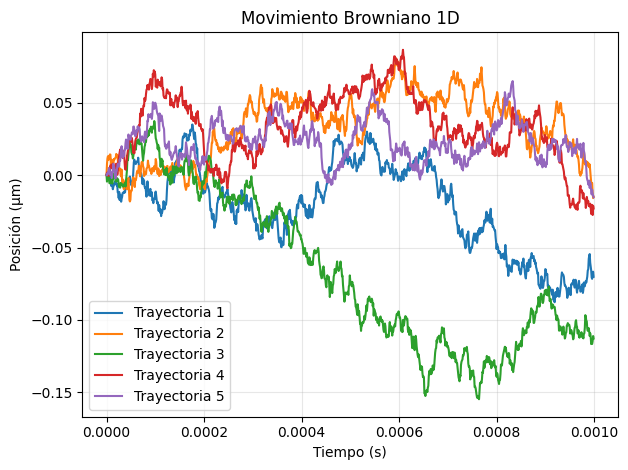

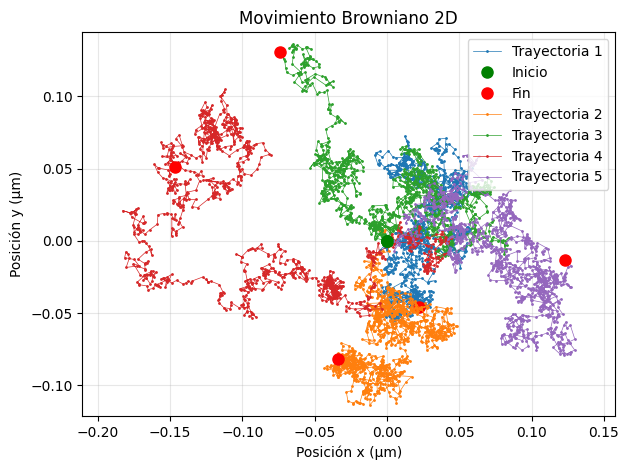

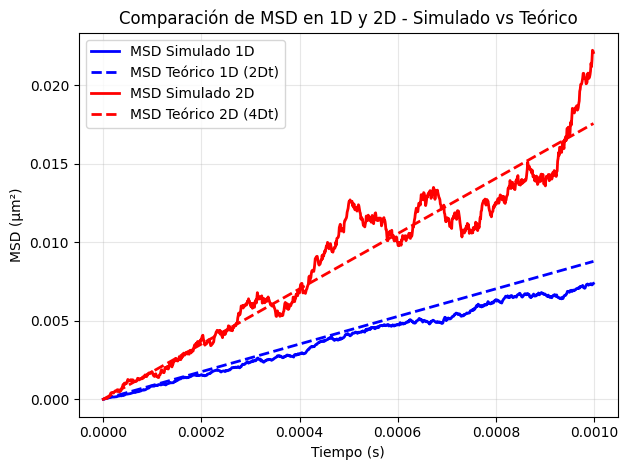

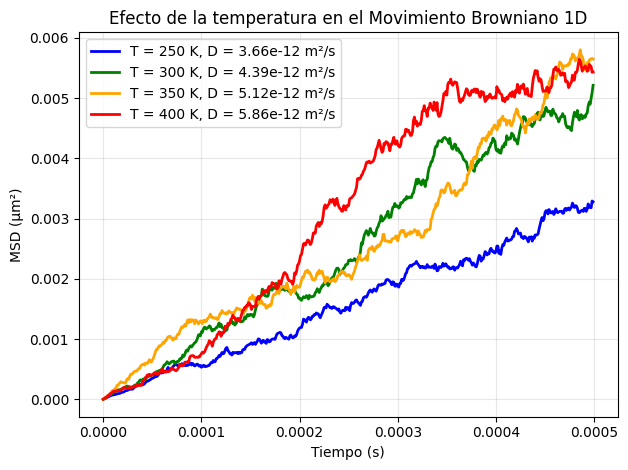

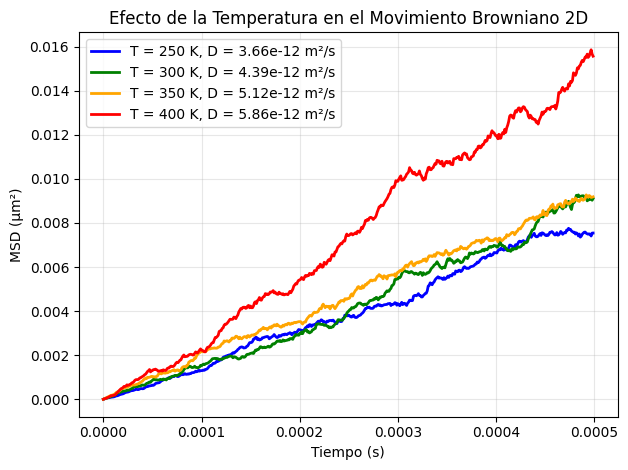

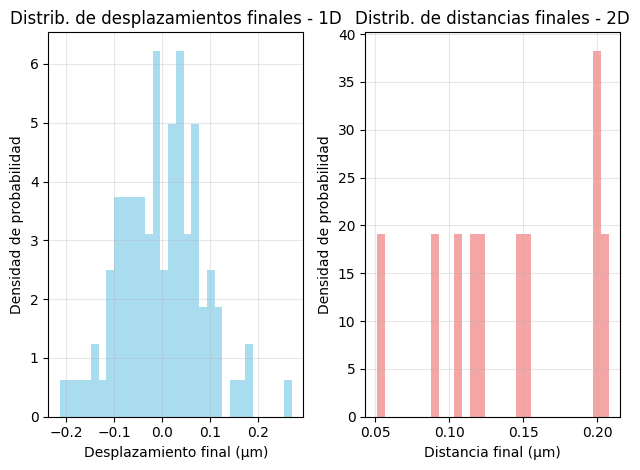

In [165]:
def main():
    print("=== SIMULACIÓN DE MOVIMIENTO BROWNIANO EN NANOPARTÍCULAS ===\n")
    # Parámetros de simulación (agua a temperatura ambiente) <- AQUÍ SE PUEDEN CAMBIAR PARÁMETROS
    temperatura=300   # 300 K = 27°C
    viscosidad=0.001  # Viscosidad del agua [Pa·s]
    radio=50e-9       # 50 nm de radio
    dt=1e-6           # 1 μs por paso
    n_pasos=1000      # 1000 pasos

    D=calcular_coeficiente_difusion(temperatura,viscosidad,radio)
    print(f"Parámetros de la simulación:")
    print(f"- Temperatura: {temperatura} K")
    print(f"- Viscosidad: {viscosidad} Pa·s")
    print(f"- Radio de nanopartícula: {radio:.2e} m")
    print(f"- Coeficiente de difusión: {D:.2e} m²/s")
    print(f"- Sigma (desplazamiento por paso): {np.sqrt(2*D*dt):.2e} m\n")

    #Simulación 1D
    trayectorias_1d=simular_trayectoria_1d(n_pasos,dt,D,n_trayectorias=100)
    tiempos=np.arange(n_pasos)*dt

    graficar_trayectorias_1d(trayectorias_1d,tiempos)

    msd_simulado_1d=calcular_msd_1d(trayectorias_1d)
    msd_teorico_1d_val=msd_teorico_1d(tiempos,D)

    #Simulación 2D
    x,y=simular_trayectoria_2d(n_pasos,dt,D,n_trayectorias=10)
    graficar_trayectorias_2d(x,y)

    msd_simulado_2d=calcular_msd_2d(x,y)
    msd_teorico_2d_val=msd_teorico_2d(tiempos,D)

    #Comparar MSD 1D y 2D
    graficar_msd_combinado(tiempos, msd_simulado_1d, msd_teorico_1d_val, msd_simulado_2d, msd_teorico_2d_val)

    #Efecto de la temperatura
    analizar_efecto_temperatura_1d()
    analizar_efecto_temperatura_2d()

    #Análisis estadístico
    desplazamientos_1d_finales=trayectorias_1d[:,-1]
    distancias_2d_finales=np.sqrt((x[:,-1]-x[:,0])**2+(y[:,-1]-y[:,0])**2)

    fig,(ax1,ax2)=plt.subplots(1,2)

    # Histograma 1D
    ax1.hist(desplazamientos_1d_finales*1e6,bins=30,density=True,alpha=0.7,color='skyblue')
    ax1.set_xlabel('Desplazamiento final (μm)')
    ax1.set_ylabel('Densidad de probabilidad')
    ax1.set_title('Distrib. de desplazamientos finales - 1D')
    ax1.grid(True,alpha=0.3)

    # Histograma 2D
    ax2.hist(distancias_2d_finales*1e6,bins=30,density=True,alpha=0.7,color='lightcoral')
    ax2.set_xlabel('Distancia final (μm)')
    ax2.set_ylabel('Densidad de probabilidad')
    ax2.set_title('Distrib. de distancias finales - 2D')
    ax2.grid(True,alpha=0.3)

    plt.tight_layout()
    plt.show()



if __name__ == "__main__":
    main()

##**Conclusiones**
El proyecto demostró exitosamente que el método Monte Carlo es una herramienta efectiva para simular el movimiento browniano de nanopartículas, permitiendo visualizar y cuantificar fenómenos estocásticos que serían difíciles de analizar mediante métodos analíticos puros. La simulación reprodujo fielmente el comportamiento aleatorio característico de las nanopartículas en fluidos.

##**Referencias**
Einstein, A. (1905). On the movement of small particles suspended in
a stationary liquid demanded by the molecular-kinetic theory of heat.
Annalen der Physik, 17(8), 549-560.

Einstein, A. (1956). Investigations on the theory of the Brownian
movement. Dover Publications.

Kroese, D. P., Brereton, T., Taimre, T., & Botev, Z. I. (2014).
Why the Monte Carlo method is so important today. Wiley Interdisciplinary
Reviews: Computational Statistics, 6(6), 386-392.

Lemons, D. S., & Gythiel, A. (1997). Paul Langevin's 1908 paper
"On the Theory of Brownian Motion". American Journal of Physics,
65(11), 1079-1081.